### **INITIALIZIATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

### **GETTING THE DATA:**
- I will use [**DuckDuckGo**](https://duckduckgo.com/) to download images. It is a privacy first search service with many useful features.

In [13]:
#@ FUNCTION FOR EXTRACTING IMAGES: 
def search_images_DDG(key, max_n=200):                                               # Initializing Function. 
    url        = 'https://duckduckgo.com/'
    params     = {'q': key}
    res        = requests.post(url, data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&', res.text)
    if not searchObj: 
        print('Token Parsing Failed !') 
        return 
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) \
                   Gecko/20100101 Firefox/71.0'}
    params     = (('l','us-en'),('o','json'),('q',key), \
                  ('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])                                            # Getting URLs. 
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass

In [14]:
#@ DEPENDENCIES AND DATASET: 
from fastbook import *                                    # Getting all the Libraries. 
urls = search_images_DDG("grizzly bear", max_n=100)       # Getting URLs of the Images. 
len(urls), urls[0]                                        # Inspecting URLs. 

(100,
 'https://gohunt-assets-us-west-2.s3.amazonaws.com/Grizzly-bear-protections-west-OG.jpg')

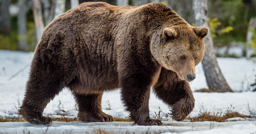

In [15]:
#@ INSPECTING THE IMAGES: 
dest = Path("./images")                      # Initializing Destination for Images. 
if dest.exists():                            # Inspecting Destination. 
    os.remove(dest)
download_url(urls[0], dest)                  # Downloading the Images. 
img = Image.open(dest)                       # Inspecting the Image. 
img.thumbnail((256, 256))                    # Inspecting the Image. 
img

**Note:**
- Awesome! It has worked nicely. I will download all the URLs for each of my search terms using **Fastai**. I will put each on a separate folders. 

In [16]:
#@ GETTING THE DATA: 
bear_types = "grizzly", "black", "teddy"                     # Initializing Types of Bear. 
PATH = Path("bears")                                         # Initializing Destination Path. 
if not PATH.exists():                                        # Checking. 
    PATH.mkdir()                                             # Creating. 
    for o in bear_types:
        dest = (PATH/o)                                      # Destination for Each Types. 
        dest.mkdir(exist_ok=True)                            # Initializing Destination if not. 
        urls = search_images_DDG(f"{o} bear")                # Getting the URLs. 
        download_images(dest, urls=urls)                     # Downloading Images. 

In [25]:
#@ INSPECTING THE DATASET: 
fnames = get_image_files(PATH)                               # Getting Image Files. 
fnames[0:2]                                                  # Inspecting. 

(#2) [Path('bears/teddy/00000017.jpg'),Path('bears/teddy/00000031.jpg')]

In [26]:
#@ INSPECTING CORRUPTED FILES: 
failed = verify_images(fnames)                               # Verifying Images. 
failed.map(Path.unlink);                                     # Removing Corrupted Images. 
len(failed)                                                  # Inspecting. 

0

### **DATA TO DATALOADERS:**
- **DataLoaders** is defined as a **Fastai** class that stores multiple **DataLoader** objects you pass to it. 

In [28]:
#@ CREATING DATALOADERS: 
bears = DataBlock(blocks=(ImageBlock, CategoryBlock),        # Initializing DataBlock. 
                  get_items=get_image_files,                 # Getting Image Files. 
                  splitter=RandomSplitter(valid_pct=0.2, 
                                          seed=11),          # Splitting Dataset. 
                  get_y=parent_label,                        # Getting Folders name. 
                  item_tfms=Resize(128))                     # Resizing Images. 
dls = bears.dataloaders(PATH)                                # Initializing DataLoaders. 

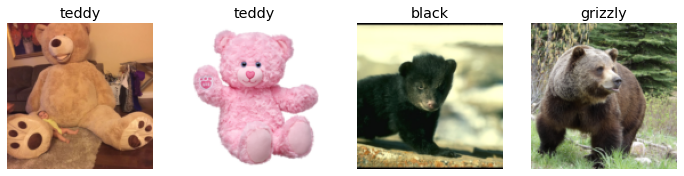

In [29]:
#@ INSPECTING THE DATALOADER: 
dls.valid.show_batch(max_n=4, nrows=1)                       # Inspecting Images. 